# Milestone 2 

Due to the reiqurement of this project being regression, after confirming with Proffesor Islam, I have changed my dataset from the Neartest earth objects (which I used in milestone 1) to Car price data which will be used in this milestone.

## Data Preprocessing

In [1]:
import pandas as pd

#reading Data
path = 'CarPrice_Assignment.csv'
Dataset = pd.read_csv(filepath_or_buffer=path)

#creates a sample of 100 
df = Dataset.sample(100)

df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
14,15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.000
172,173,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669.000
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.000
64,65,0,mazda 626,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Correlation 

This is a heatmap used to find the correlation for all numeric values, Looking at the map it seems that Curb Wieght, engine size, and horsepower are the value that most correlate with the price of the car

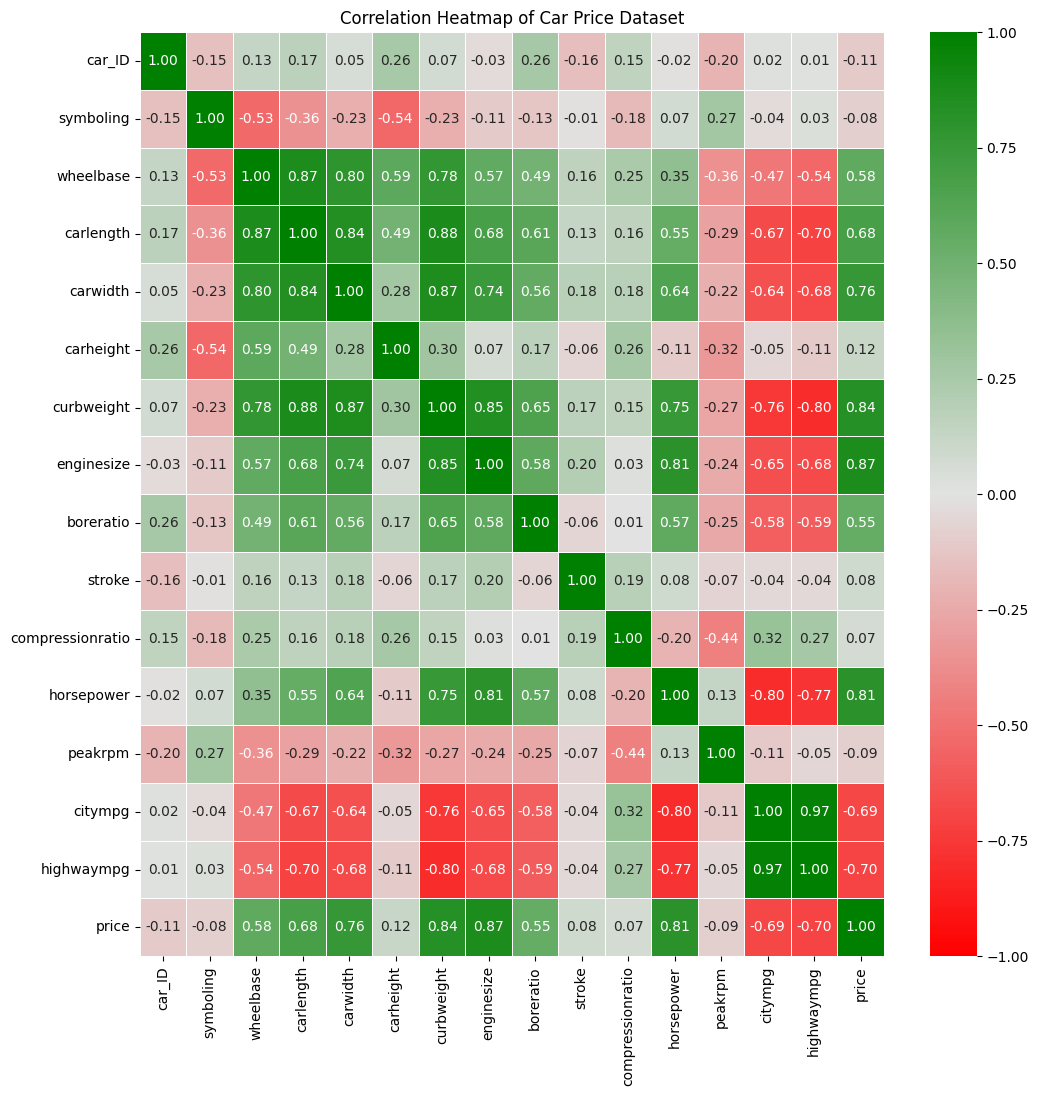

In [9]:
#Correlation
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Define custom colors for the colormap
colors = ["red", "#e2e2e2", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

# Calculate the correlation matrix
corr = Dataset.corr(numeric_only=True)

# Create a heatmap using the custom colormap and setting color range
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Car Price Dataset')
plt.show()

## NaN values
check if there are any null values

In [11]:
Dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Training model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = df[['enginesize', 'horsepower', 'curbweight']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train linear model
model = LinearRegression()
model.fit(X_train, y_train)
display(X_test)
model.predict(X_test)

,enginesize,horsepower,curbweight
18,61,48,1488
137,121,160,2847
94,97,69,1951
131,132,90,2460
158,110,56,2275
154,92,62,2290
204,141,114,3062
114,152,95,3485
3,109,102,2337
14,164,121,3055


array([ 1051.95437151, 16336.09279033,  6699.73824671, 12384.37644518,
        8030.58171868,  6795.73688342, 16167.51867339, 17259.32256177,
       10656.2778966 , 18590.18468142, 22304.58935544, 15323.07477186,
       10953.38953805,  6610.18835542, 11586.16068659, 17794.48083414,
        5941.10095277,  6014.54056472, 13325.70157135, 10005.99095958])